
# Plot classification probability

Plot the classification probability for different classifiers. We use a 3 class
dataset, and we classify it with a Support Vector classifier, L1 and L2
penalized logistic regression (multinomial multiclass), a One-Vs-Rest version with
logistic regression, and Gaussian process classification.

Linear SVC is not a probabilistic classifier by default but it has a built-in
calibration option enabled in this example (`probability=True`).

The logistic regression with One-Vs-Rest is not a multiclass classifier out of
the box. As a result it has more trouble in separating class 2 and 3 than the
other estimators.


Accuracy (train) for L1 logistic: 82.7%
Accuracy (train) for L2 logistic (Multinomial): 82.7%
Accuracy (train) for L2 logistic (OvR): 79.3%
Accuracy (train) for Linear SVC: 82.0%
Accuracy (train) for GPC: 82.7%


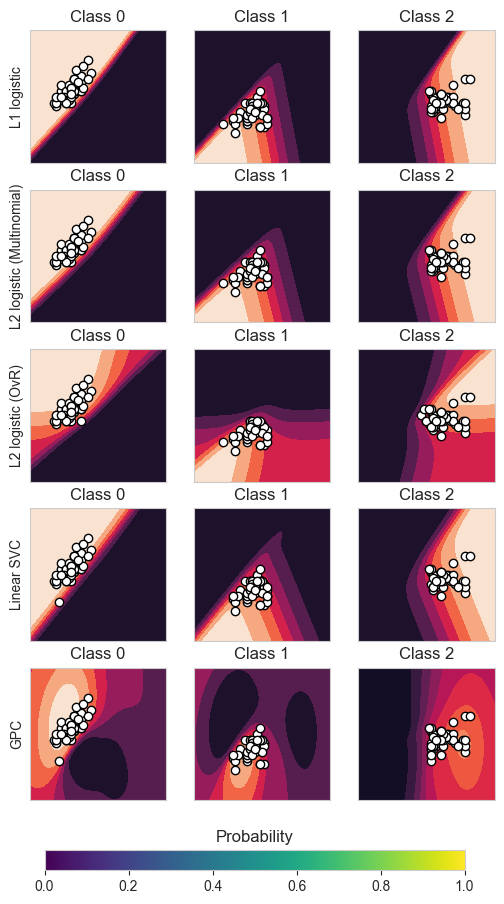

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(C=C, penalty="l1", solver="saga", max_iter=10000),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", max_iter=10000
    ),
    "L2 logistic (OvR)": OneVsRestClassifier(
        LogisticRegression(C=C, penalty="l2", solver="saga", max_iter=10000)
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=len(iris.target_names),
    figsize=(3 * 2, n_classifiers * 2),
)
for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X, y).predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy (train) for {name}: {accuracy:0.1%}")
    for label in np.unique(y):
        # plot the probability estimate provided by the classifier
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict_proba",
            class_of_interest=label,
            ax=axes[classifier_idx, label],
            vmin=0,
            vmax=1,
        )
        axes[classifier_idx, label].set_title(f"Class {label}")
        # plot data predicted to belong to given class
        mask_y_pred = y_pred == label
        axes[classifier_idx, label].scatter(
            X[mask_y_pred, 0], X[mask_y_pred, 1], marker="o", c="w", edgecolor="k"
        )
        axes[classifier_idx, label].set(xticks=(), yticks=())
    axes[classifier_idx, 0].set_ylabel(name)

ax = plt.axes([0.15, 0.04, 0.7, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="viridis"), cax=ax, orientation="horizontal"
)

plt.show()